#Import library

* **numpy.polynomial.polynomial**: provides a number of objects (mostly functions) useful for dealing with polynomials.
* **datetime**: create date and datetime objects, loop through a range of dates, parse and format date strings, and more.
* **matplotlib.pyplot**: used to create 2D graphs and plots by using python scripts.
* **pandas**: analyze data.
*	numpy: working with arrays.
*	**r2_score**: evaluate the performance of a linear regression model.
*	**LinearRegression**: used to call Linear Regression model.
*	**mean_squared_error**: measures the average squared difference between the estimated values and true value.
*	**seaborn**: making statistical graphics.
*	**matplotlib.pyplot**: creating static, animated, and interactive visualizations.


In [ ]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Import data 

In [36]:
df=pd.read_csv(r"/content/ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,763.369995,786.789978,760.934998,773.835999,773.835999,2201159936
1,2017-12-27,774.969971,789.252991,738.413025,762.841980,762.841980,2100029952
2,2017-12-28,762.208008,763.318970,701.187012,737.023010,737.023010,2389149952
3,2017-12-29,740.388977,770.117004,729.607971,753.591980,753.591980,2648969984
4,2017-12-30,753.815002,753.815002,685.231018,717.257019,717.257019,3187780096
...,...,...,...,...,...,...,...
1822,2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,1218.182129,5297471739
1823,2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,1220.159424,4835831923
1824,2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,1221.148560,2626153345
1825,2022-12-25,1221.171509,1223.517822,1203.719604,1218.962036,1218.962036,3942720070


#Convert to a datetime data type

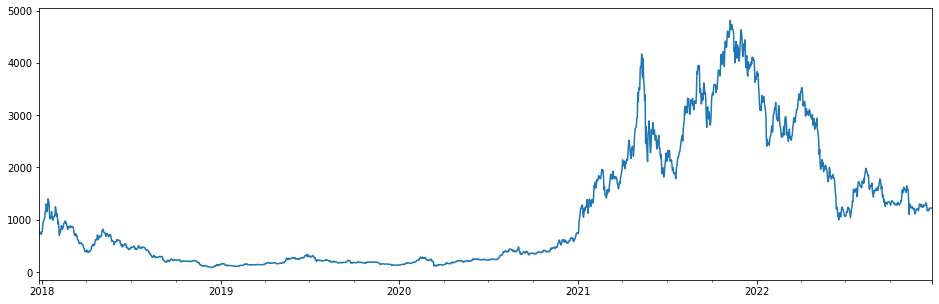

In [37]:
df.index = df['Date']
# Convert the 'date' column to a datetime data type
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df['Time'] = np.arange(len(df.index))
df['Close'].plot(figsize=(16,5))

In [38]:
df2 = df.copy()
#plot the linear regression and the close price

#create the new column called Numbers

* Create the new column called Numbers. Then, we store the “Numbers” to X (independent variable) and ClosePrice to Y (dependent variable).
* Using LinearRegression to fix X and Y.
* Find Intercept (β0).
* Find Slope (β1).


In [39]:
df2['Numbers'] = list(range(0, len(df2)))
#store the 'Numbers' to X and ClosePrice to Y
X = np.array(df2[['Numbers']])
Y = df2['Close'].values
linearmodel = LinearRegression().fit(X,Y)
print('Intercept' , linearmodel.intercept_)
print('Slope' , linearmodel.coef_)
df2['Numbers']

Intercept -207.71431435377758
Slope [1.48249196]


2017-12-26       0
2017-12-27       1
2017-12-28       2
2017-12-29       3
2017-12-30       4
              ... 
2022-12-22    1822
2022-12-23    1823
2022-12-24    1824
2022-12-25    1825
2022-12-26    1826
Name: Numbers, Length: 1827, dtype: int64

#Visualization

* Substitute the result of Intercept and Slope into the formula: **y_pred = linearmodel.coef_* X + linearmodel.intercept_** to find Close Price of BTC-USD.
* Visualize predict Close Price of BTC-USD.


Text(0.5, 1.0, 'Close Price Of ETH-USD')

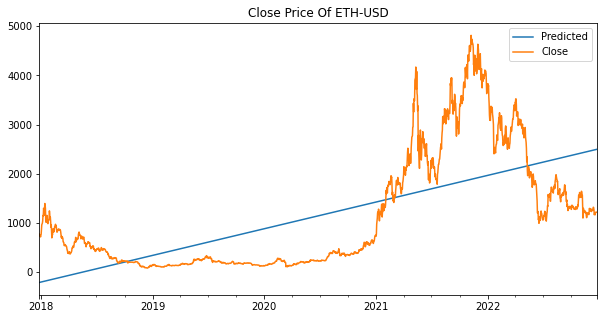

In [40]:
#prepare the data for visualization
#store the predicted prices from the model and store them into y_pred
#y = ax + b 
y_pred = linearmodel.coef_* X + linearmodel.intercept_
#store the y_pred into new colums call Predicted
df2['Predicted'] =  y_pred
#plot the data
df2['Predicted'].plot(figsize=(10,5),legend = True)
df2['Close'].plot(figsize=(10,5),legend = True)
plt.title('Close Price Of ETH-USD')

#Model assessment

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(df2['Close'], df2['Predicted'])
mape = mean_absolute_percentage_error(df2['Close'], df2['Predicted'])
mse = mean_squared_error(df2['Close'], df2['Predicted'])
rmse = np.sqrt(mse)
print("MAE: ",mae)
print("MAPE: ", mape*100)
print("RMSE: ", rmse)

MAE:  750.1421325520447
MAPE:  154.0012120192733
RMSE:  910.0702609046136
